# Simulation - generating random numbers with Numpy

- `np.random.choice`: selects random options from a list

- `np.random.uniform`: generates numbers between a given lower and upper bound

- `np.random.random`: generates numbers between 0 and 1

- `np.random.randn`: generates numbers from the standard normal distribution

- `np.random.normal`: generates numbers from a normal distribution with a specified mean and standard deviation

- `rvs()`: generates random values based on the distribution. We can pass
    - no arguments to get a single random value. Ex: `die_distribution.rvs()` --> 6
    - a single integer to get that many random values. Ex: `die_distribution.rvs(5)` --> array([3, 5, 3, 2, 4])
    - a tuple w/ the dimensions of a matrix of random values. Ex: `die_distribution.rvs((5, 5))` --> array([[3, 4, 2, 2, 1],
       [2, 2, 1, 1, 2],
       [4, 6, 5, 1, 1],
       [5, 2, 4, 3, 5],
       [3, 5, 1, 6, 1]])

# Probability Distributions

### Uniform Distributions
- used to model events where outcomes is **discrete** and each outcome has an equally likely chance of happening
- need a finite number of outcomes equally likely to happen
- Allows you to construct a random variable that has an equal opportunity of being any one of the integers in the range you establish using the `low` (inclusive) and `high` (exclusive) below. `size` is an optional parameter, as well.
- **Discrete uniform distributions** have a finite number of outcomes. 
- **A continuous uniform distribution** is a statistical distribution with an infinite number of equally likely measurable values.
- `uniform_distribution = stats.randint(low, high, size)`

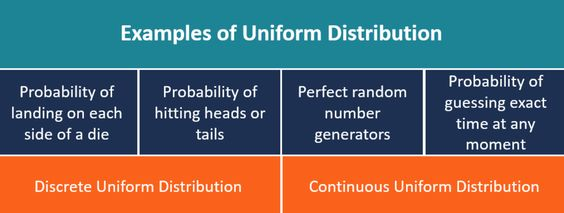

### Binomial Distribution
- used to model the number of successes after a number of trials, given a certain probability of success. 
- **discrete, fixed # of events**
- defined by a **number of trials**, and a **probability of success**.
- assumes that each trial is independent of the others.
- A binomial distribution with an n of 1 is referred to as a Bernoulli Distribution.
    - number of trials (n)
    - probability of success (p)
    - stats.binom(n, p )
    - X = number of success in trials
- `binomial_distribution = stats.binom(n, p)`

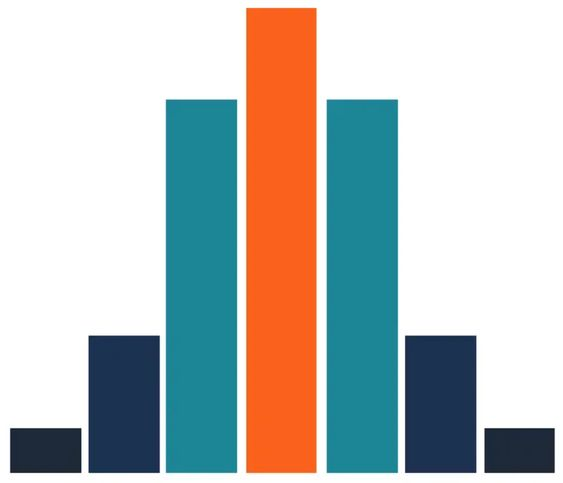

### Normal Distribution
- used to model a **continuous** random variable where the further away from the mean you are, the less likely the outcome. 
- commonly referred to as the "bell curve" and many continuous variables tend to follow a normal distribution
- defined by a **mean** and a **standard deviation**
- **standard normal distribution** is a normal dist. w/ a mean of 0 and standard deviation of 1.
- They are symmetric.
- The mean, median, and mode are equal.
- They follow the Empirical rule (68 - 95 - 99.7).
    - mean($\mu$)
    - std dev ($\sigma$)
    - stats.norm($\mu$, $\sigma$ )

-`normal_distribution = stats.norm(mean, standard deviation)`

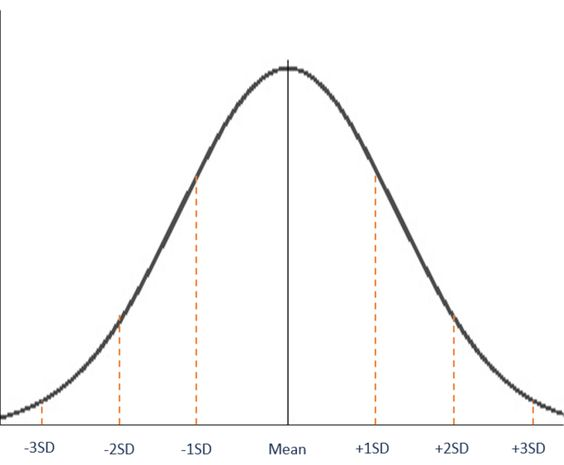

### Poisson Distribution
- used to model a situation where a *certain number of events happen over a specified time interval*.
- number of events that happen is a **discrete** measure.
- (**Continuous**, no fixed number of events. Can go off into infinity.)
- tells us the likelihood of a certain number of events occuring over the **time period**
- assumes events are independent of each other and independent of the time since the last event. 
- only one parameter(λ) = must know the average rate at which the event happens for this distribution.
    - rate ($\lambda$)
    - stats.poisson($\lambda$)
    - X = number of events per unit time
- `poisson_distribution = stats.poisson(average rate)`
- examples: 
    - number of emails sent by a mail server in a day
    - number of phone calls received by a call center per hour
    - number of decay events per second from a radioactive source

# Working With Statistical Distributions
`from scipy import stats
from scipy.stats import norm, binom`

## PDF / PMF
Probability our random variable takes on a **given value**.

- **pdf** : probability density function, for **continuous** distributions
- **pmf** : probability mass function, for **discrete** distributions


## CDF & PPF
Probability our random variable takes on a value **less than or equal to**
a given point.

- **cdf** : cumulative density function, given a value, what's the probability? (including the point)
- **ppf** : percent point function, given a probability, what's the value? (inclusive)

## SF & ISF
Probability our random variable takes on a value **greater than** a given
point.

- **sf** : survival function, given a value, what's the probability? (excluding the point)
- **isf** : inverse survival function, given a probability, what's the value? (exclusive)




### Scipy lets us specify parameters for the various distributions and then use the functions outlined above

- A **normal distribution** with µ = 70, σ = 8

`my_normal_distribution = norm(70, 8)`

   - What's the likelihook the value is over 80?
    
    `my_normal_distribution.sf(80)`
    
   - What value is the cutoff point for the bottom 30%?
    
    `my_normal_distribution.ppf(.3)`
    
- A **binomial distribution** with n = 10, p = .3

`my_binomial_distribution = binom(10, .3)`
   
   - What's the likelihood of 5 or less successes?
    
    `my_binomial_distribution.cdf(5)`
   
   - What's the probability of exactly 4 successes?
   
   `my_binomial_distribution.pmf(4)`

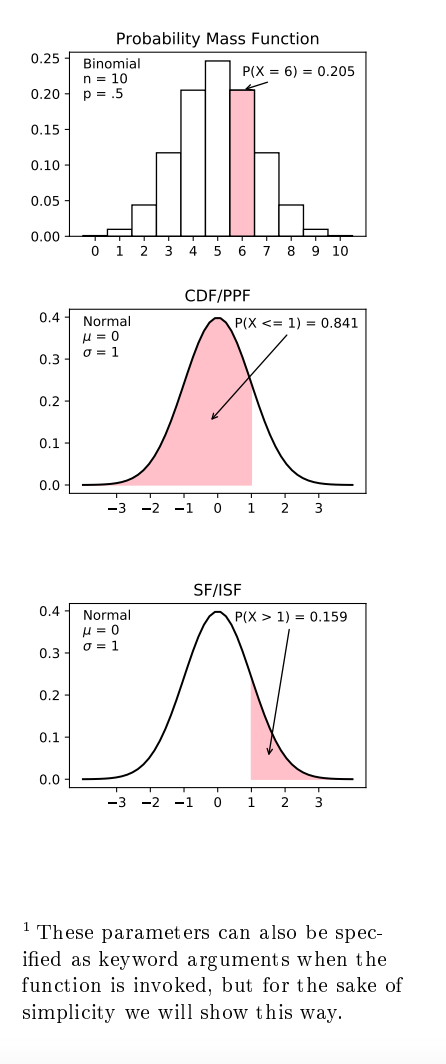

# Hypothesis Testing

In general hypothesis tests are performed like so:

1. Choose the right type of test for your data / question
    - **t-test**
    - **correlation**
    - **chi square**
2. Set a desired confidence level and form hypothesis
3. Calculate the appropriate test statistics and p-value
4. Conclude based on the above statistics

### Central Limit Theorem
- tells us the **sampling distribution** for a random variable is normally distributed, even if the underlying random variable is not
- If we repeatedly take random samples of the same size from a the same population, and compute the sample mean for each of the samples, the sampling distribution of the sample means will be a normal distribution no matter what the initial distribution of the population was.
- Even if our original population has a skewed distribution, our sampling distribution will be normal if we have a large enough sample!

### Null Hypothesis ($H_0$)
- "status quo" and usually reflects no change or no difference
- results of a hypothesis test can lead us to **reject the null hypothesis** or **fail to reject the null hypothesis**
- doesn't necessarily mean that the alternative hypothesis is true

### Alternative Hypothesis ($H_a$)
- there is a difference or change
- the difference can be greater than or less than
- any difference (**two-tailed**) or specific difference aka greater/less than (**one-tailed**)

### Confidence Interval
- range of values within we are sure our statistic will fall a certain percent of the time, for our testing before we begin.

### Significance Level (alpha  $\alpha$ )
- choosing a confidence level, sets up significance level
- defined as 1 - our confidence level.
- typical values are 95%, 99%, 99.9%

### p-value
- one the the values obtained from hypothesis test
- calculation differs depending on specific type of test we are running(t-test, correlation, or chi square)
- p-value is the chance that we obtained the results we did (or would obtain more extreme results) due to chance if the null hypothesis is true
- If the P-value is small, say less than (or equal to) $\alpha$, then it is "unlikely."
    - If the P-value is **less than (or equal to) $\alpha$**, then the null hypothesis is rejected in favor of the alternative hypothesis. 
- If the P-value is large, say more than $\alpha$, then it is "likely."
    - If the P-value is **greater than $\alpha$**, then the null hypothesis is not rejected.

### Hypothesis Testing Errors
- **type I error**: when we reject the null hypothesis, but, in reality, null hypothesis is true (a false alarm/false positive)
    - Example: our test indicates there is a relationship in the population, but in reality there is no relationship
- **type II error**: when we fail to reject the null hypothesis when it is actually false(a miss/false negative). It is not true and null hypothesis should have been rejected.
    - Example: our test indicates there is not a relationship in the population, but in reality there IS a relationship

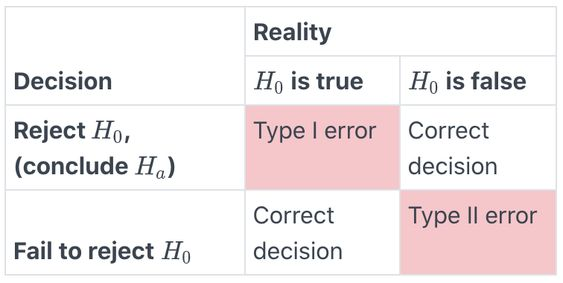

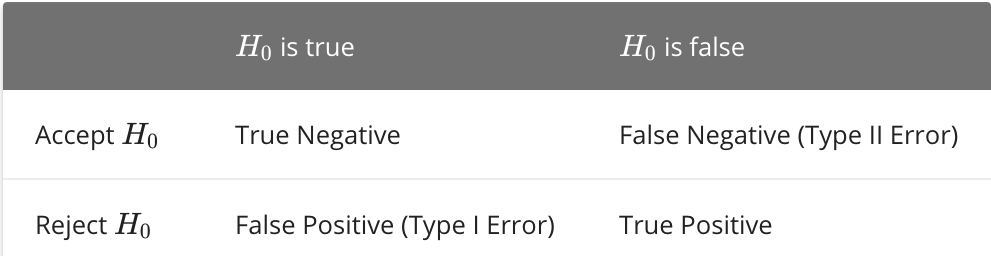

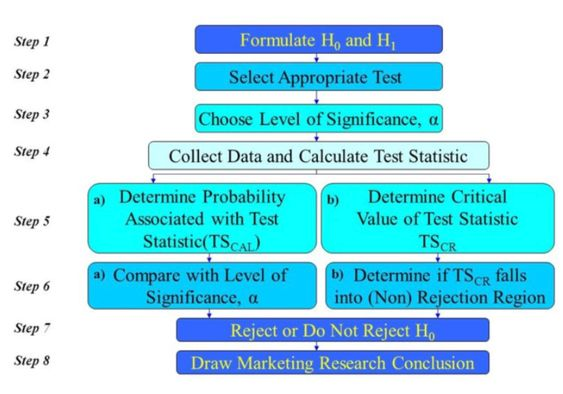



# T-Test

- A type of inferential statistic used to determine if there is a significant difference between the means of two groups which may be related in certain features.
- It **compares a categorical and a continuous variable** by comparing the mean of the continuous variable by subgroups or the mean of a subgroup to the mean of the population.

### One Sample T-test
- compares the mean of a subgroup to the mean of a population
- Example: Sunday tips vs the rest of the week
- `stats.ttest_1samp`

### Two Sample T-test
- compares the means of 2 subgroups
- Example: comparing average tips btwn smokers vs nonsmoker
- `stats.ttest_ind()` 

### 2-tailed t-test
- checks for **any** difference, regardless of direction
- checks if the means of 2 groups are different
- use **p-value** as is, and compare it to the alpha ($\alpha$)
- used if alternative hypothesis states "there is a difference between these groups)

### 1-tailed t-test
- checks if one mean is **greater than** or **less than** the other 
- to check if greater than, we evaluate **(p/2) < a and t > 0** (testing if mean is higher than the other)
- to check if less than, we evaluate **(p/2) < a and t < 0** (testing if mean is lower than the other)
- used if alternative hypothesis states "X group has higher/lower tips than Y"

# Correlation

- A statistical measure that describes how **two continuous variables** are related and indicates that as one variable changes in value, the other variable tends to change in a specific direction.
    - **Positive Correlation**: both variables change in the same direction.

    - **Neutral or No Correlation**: No relationship in the change of the variables.

    - **Negative Correlation**: variables change in opposite directions.
    
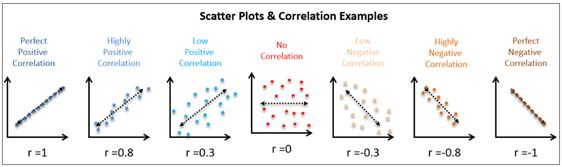


### Pearson's Correlation Coefficient
The goal of this test is to answer the question: do two samples have a linear relationship?

To answer this question, we will take the following steps:

1. Calculate the Pearson correlation coefficient, **r**
2. Calculate the corresponding t-values
3. Test whether the t-values are significant or not

We can use `r, p = stats.pearsonr(x,y)` to find r and p-values.

### Correlation Gotchas
When working with correlation, keep in mind:
- Correlation is not causation. Correlation means that two variables are associated, but doesn't tell us whether one causes the other or not.
- Correlation measures linear relationship between the 2 variables. However, there may be other types of relationships, such as a quadratic or absolute value relationship.
- Correlations can be misleading when confounding variables are ignored. Correlation doesn't tell the whole story of a dataset. Correlation just looks at 2 variables in isolation, and doesn't account for any others.
    - Example: a certain subgroup could have a strong correlation while another does not, or a third variable could be influencing both of the variables.
- Correlation tells you nothing about how large the relationship is.
    - The correlation coefficient shows us how linearly correlated two variables are, but doesn't tell us the scale. That is one variable could increase/decrease in lock step with another, but the size of the change could be tiny.

# Chi Square ($x^2$) 
- **Categorical vs categorical variables**
- The chi square test is used to determine whether there is a statistically significant difference between the **expected** and **observed** frequencies in one or more categories.
- Observations are classfied into mutually exclusive classes. In other words, it is a way of testing for group membership.
- The chi square test works by comparing the **observed/actual contingency table** against the **expected/predicted contingency table** that would be the case if group membership in the variables were independent. 
    1. Aquire data
    2. Create Hypothesis - Null Hypothesis: The two variables are independent. (there is no dependence) (assumes that the observed frequencies for a categorical variable match the expected frequencies for the categorical variable)
    3. Set your confidence level and alpha
    4. Calculate Test Statistic - run chi square test and use p-value to decide whether to reject the Null Hypothesis that the variables or categories are independent.
    

- $H_0$ There is independence between the smoker and time of the day
- $H_a$ is that there is a dependence



- Step 1: make a contingency table `observed = pd.crosstab(df.column_name, df.column_name)`
- Step 2: set alpha `alpha = .01` or `.05`
- Step 3: return values `chi2, p, degf, expected = stats.chi2_contingency(observed)`


- Step 4: use p-value `if p < alpha:
    print ("We reject the null")
else:
    print("We fail to reject the null")`